# Multiple Linear Regression and Regression Error Metrics

In [ ]:
# y = b0 + b1X1 + b2X2 + b3X3    multiple linear regress.


## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

## Read Data Set

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation -  EDA

In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
# !pip install missingno  
# eksik verilerin yapısını ve dagılımını görselleştirir

In [11]:
import missingno as msno

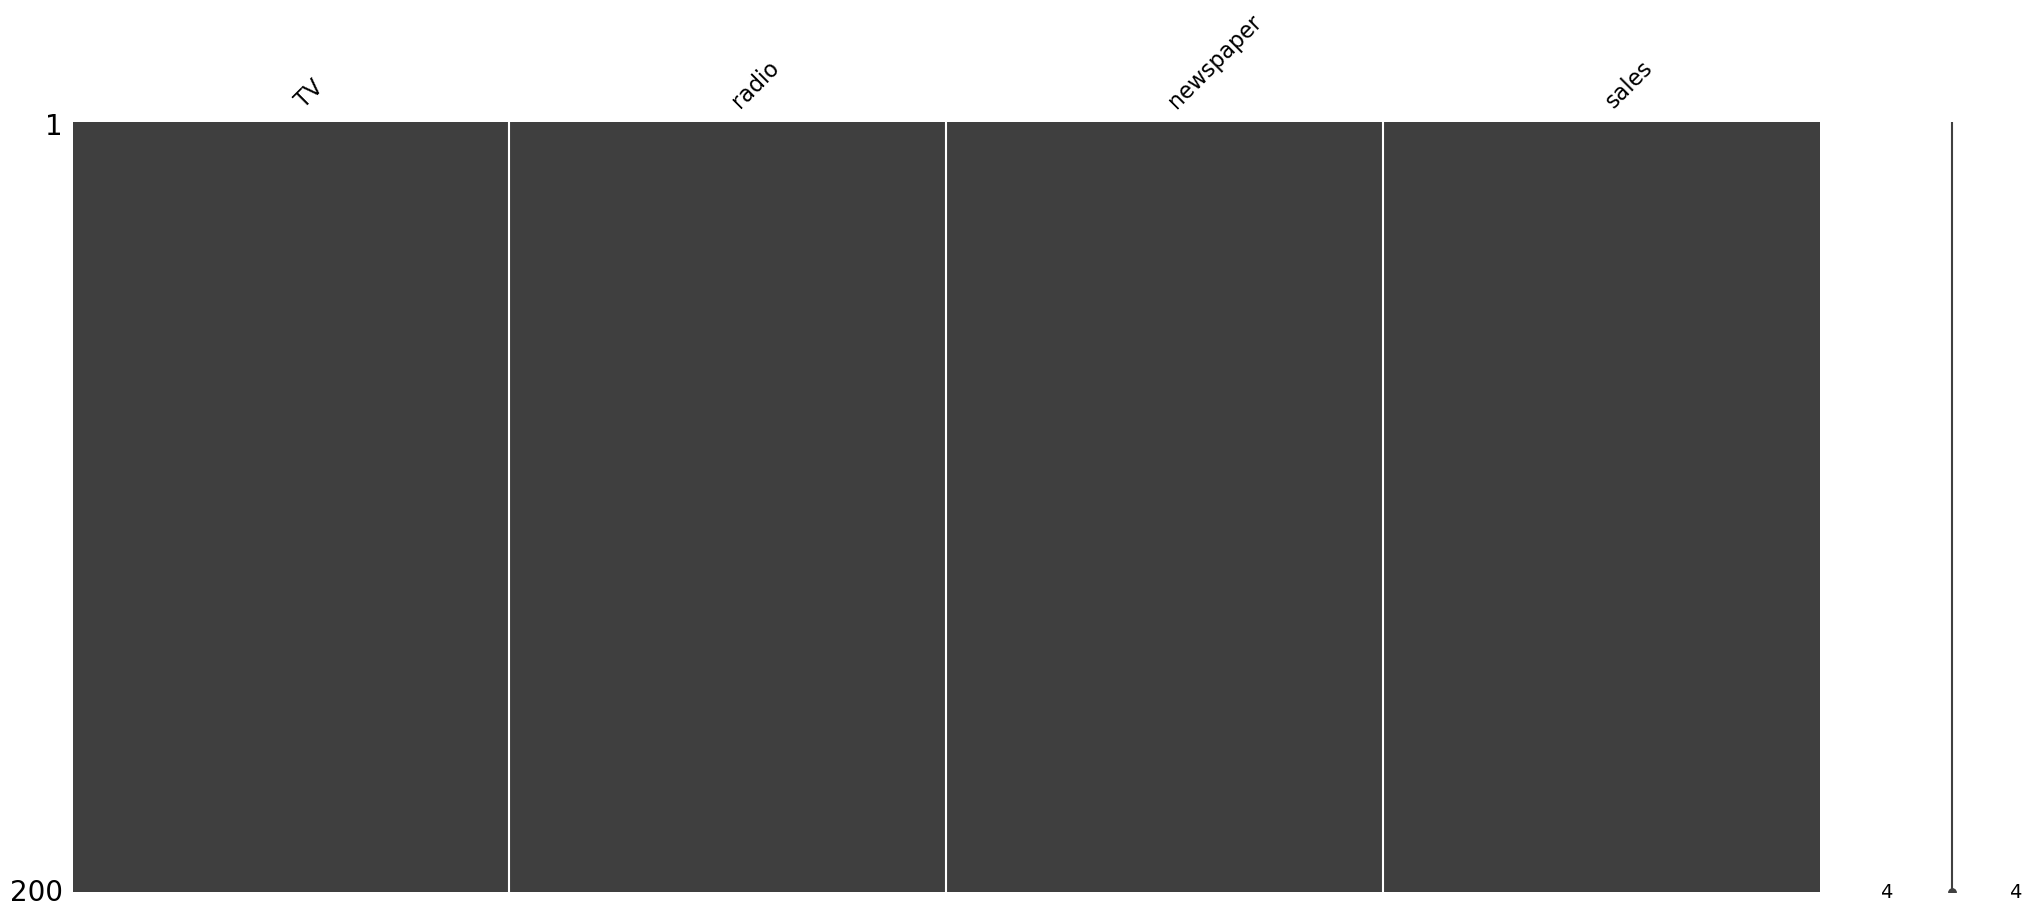

In [12]:
msno.matrix(df);

In [ ]:
# örnek null hucreleri olan bir resim

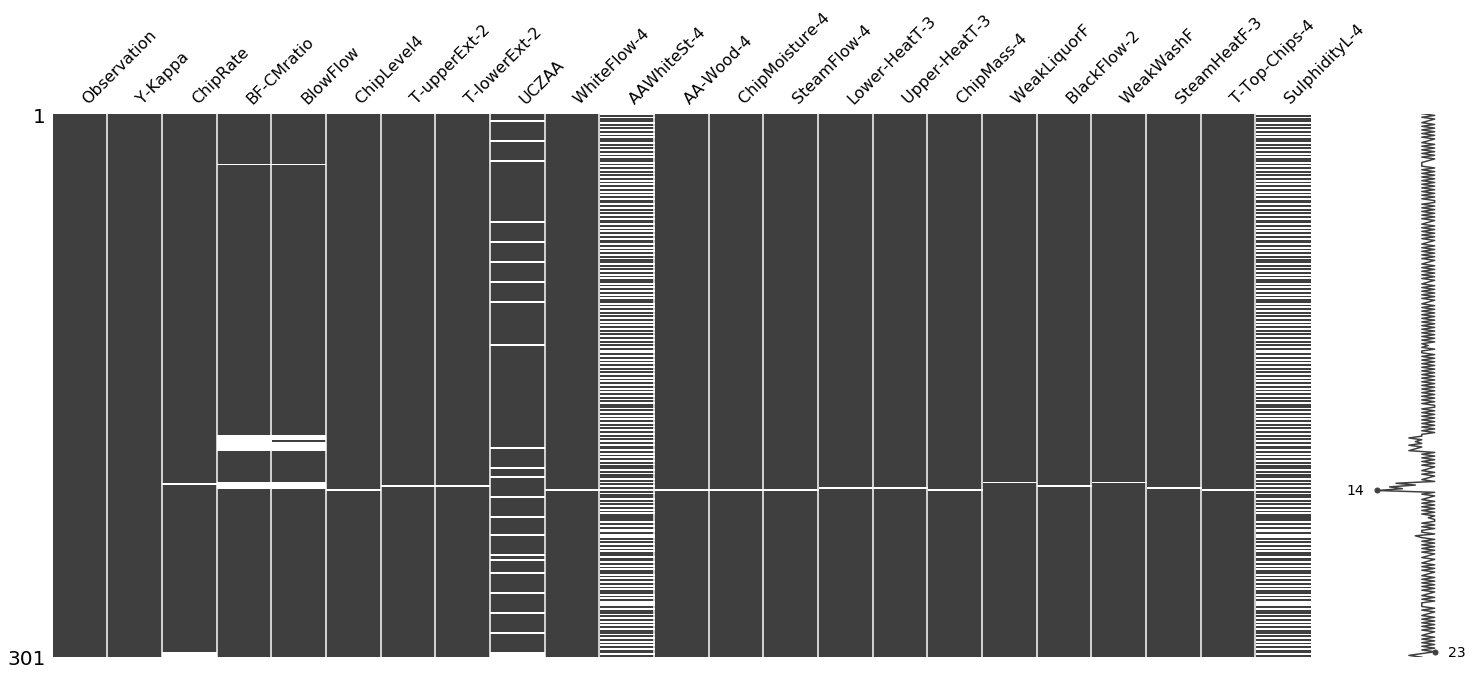

In [13]:
df.sort_values(by = "sales", ascending=False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
# summarytools  Pyython paketi özet istatistikleri görüntüler

In [ ]:
# !pip install summarytools

In [16]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TV[float64],Mean (sd) : 147.0 (85.9)min < med < max:0.7 < 149.8 < 296.4IQR (CV) : 144.4 (1.7),190 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3cTY6iQBiA4a+G1qAmEGOiOy8wySxceog57BxhFp7AG7gzMQQj3UQEZjW7bn+qQOurfp91Q2N4Q9cPtmnbVgDf/Xj1BQD3eLv1A8aYkYgMLc9/btv2w/JYWAj1fl0N1Rgzms1mv5Mkmdqc/Hg8ZsaYP75++NCEfL9uPVGHSZJM1+v1R5qm5SMnzvM83mw208PhMBQR7z54oIK9Xzf/9IuIpGlazufzd4vzjyyOgaMQ7xeTKahAqFCBUKECoUIFQoUKhAoVCBUq3LWOiudx3AJNmqYZdHk9viBUj7hugVZVFdd1/bMsy78iYrPg7y2vQw31BYsrrLdARUR2u910u92OL5dL1MfFvZK3oYb8gsUttlugWZZ5uwXqyttQJeAXLPA4n0MVkTBfsPBVXdcDEUmMMban6G245X2oeI6iKAZVVf1aLpdRFEUPj49F+h1uEeoXvttE7nw+v8VxPF6tVuViscgePb7v4RahfuI7T+Qmk4ntUEukx+EWoX6OiZxngg3VcWKQNE0zSNM0YyLnhyBDdZ0YhLzDo1WQobpODFx3eBye5sHu1bsKMtT/bCcGLjs8Lk9znuRfCzrUV3B5moe8V++KUHti8zTXvlfvOIG9uvZMqOiE6wT21tozoaITLkOee9aeew21i7XMji8JPXPY2bo67OktVNYy0aXeQn31WibC0vsY9RVrmQgPX5eGCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChXu+tfoeZ7Hj574dDrFIiJFUcT7/X78zOO1/m6t1+16/D19/QMrB7y1WUnQAQAAAABJRU5ErkJggg=="">",0(0.0%)
2,radio[float64],Mean (sd) : 23.3 (14.8)min < med < max:0.0 < 22.9 < 49.6IQR (CV) : 26.5 (1.6),167 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsElEQVR4nO3cPW/aQBjA8ecggHmRLYQKG0vHSh088iH6YfsRMvAJMmTpxIaELBBuEMZ2l6ZLWsB3vsSP+//N8YtO/8R3p1NMWZYCNF3no18AuMfDrR8wxgxFpG95/3NZli+W1wJ/XA3VGDOczWbfwjCc2tz8cDgkxpjvxApXt/6i9sMwnK5Wq5coik5Vbrzf74P1ej3d7XZ9ESFUOLn56RcRiaLoNJ/Pf1rcf2hxDfAGiymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQoW7DqWgGs7w1o9Qa8YZXj8ItX6c4fWAUD3hDG+9Gh0qc73qHMesIyKFw+O9jXljQ2WuV53LmOV53kvT9PNkMvnR6XQym+f7HPPGhirM9WxYj9lms5k+PT19iuP4ebFYJFUf7HvMvYaa53lPREJjjM3lYVEUvSiKEuZ61djMj5MkGYqIjMdj27m1iMcx9xZqmqa9LMu+LpfLbrfbrfTbLSKSZVmQ5/mX0+n0KCK2A4eW8Bbq+Xx+CIJgFMfxyeZT8vtTNLpcLl0f7wddvM9RbT8lr58iQKTZi6kP5bDNExZF0av7ff53hPoXLts8zK39aG2orjsOk8lkvlqtDpbbPMyta9bKUOvacRgMBo+22zyoVytDZcehfVoZ6it2HNqDE/5QodV/UfG+HBewV09eESpq4bqAvXXyilAbpo6DPDW/0l1cFrD3nLwi1AZpw0Eeh9NXVxewhNogbKv9G6E2ENtqb7E9BRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS4639P7ff7oOqNj8djICKSpmmw3W5H73m91mdrfW/X6+/p6xfCCaHWusjxaAAAAABJRU5ErkJggg=="">",0(0.0%)
3,newspaper[float64],Mean (sd) : 30.6 (21.8)min < med < max:0.3 < 25.8 < 114.0IQR (CV) : 32.4 (1.4),172 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACY0lEQVR4nO3cPY7aQBiA4W/MgsyCbCEi6GjSp6DkEDlsroDELXIBJGtlxMQI5DhNiCItC3jGTuYbvU+9YyhemZ0f2zRNI0Dokv/9BYBnvDz6A2PMWERGjtc/N01TOY4F/rgbqjFmPJ/Pv2ZZNnO5+OFweDPGfCNW+Hp0Rx1lWTbbbDZVnuenNhcuyzLd7XazoihGIkKo8PLwp19EJM/z02Kx+OFw/bHDGOAdJlNQgVChAqFCBUKFCoQKFZ6a9buq63ooIpkxxvUSbBhARHoM1Vo7vFwuX1ar1WAwGLRag71iwwBXvYV6Pp9f0jR9Xa/Xp+Vy+dZ2PBsG+FuvP/0iIpPJxHWzQIQNA/zGZAoqECpUIFSoQKhQoffJlA/PdVjWYCMSbKi+67CswcYl2FB91mFZg41PsKFeeazDsgYbESZTUIFQoQKhQoXg/0d1xRHDuEQZKkcM4xNlqBwxjE+UoV5xxDAeTKagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoULUO1M+eF4rLIR6A89rhYdQb+B5rfAQ6h08rxUOJlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqMCCfw84J9A9Qu0Y5wT6Qagd45xAPwi1J5wT6BaTKajAHTUwvIXwNkINCG8h/BihBoS3EH6MUAPEWwjfYzIFFQgVKhAqVCBUqECoUIFQoQLLU5GJ9YghoUYk5iOGhBoR3yOG2+12URTFJ2PMwfErJCLy03Hs3bv5U6GWZZm2/dTj8ZiKiFhr0/1+//ovx2v97K6+t4uqqrzuxnVdD621n6fT6fckSS5txz+6m/8CVzmUDQaXxEgAAAAASUVORK5CYII="">",0(0.0%)
4,sales[float64],Mean (sd) : 14.0 (5.2)min < med < max:1.6 < 12.9 < 27.0IQR (CV) : 7.0 (2.7),121 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2F

In [17]:
# mean ve Std değerleenini birbirine yakınlığının outlier tespitindeki önemi hakkında bir örnek

print ( np.mean([100,110,120,115]))
print ( np.std([100,110,120,115]))

111.25
7.39509972887452


In [18]:
print ( np.mean([100,110,120,700]))
print ( np.std([100,110,120,700]))

257.5
255.57533136044253


In [19]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


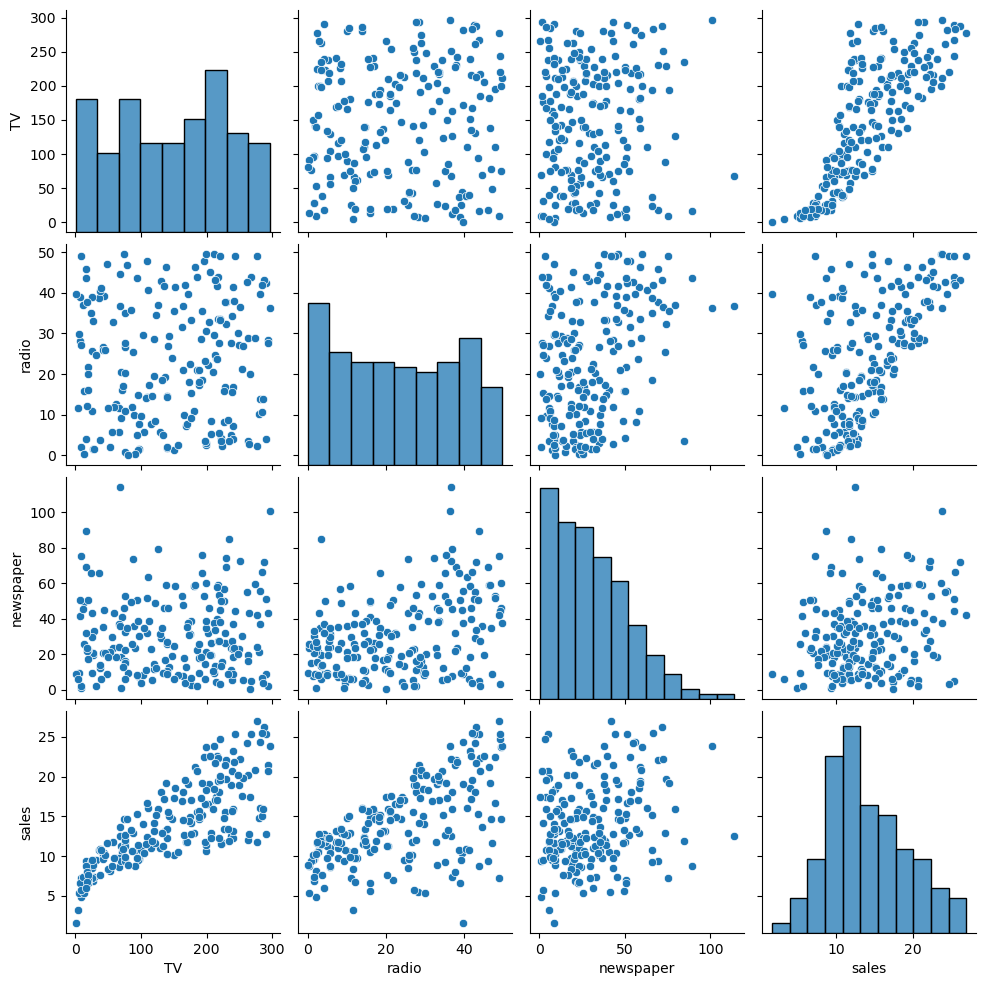

In [20]:
sns.pairplot(df);

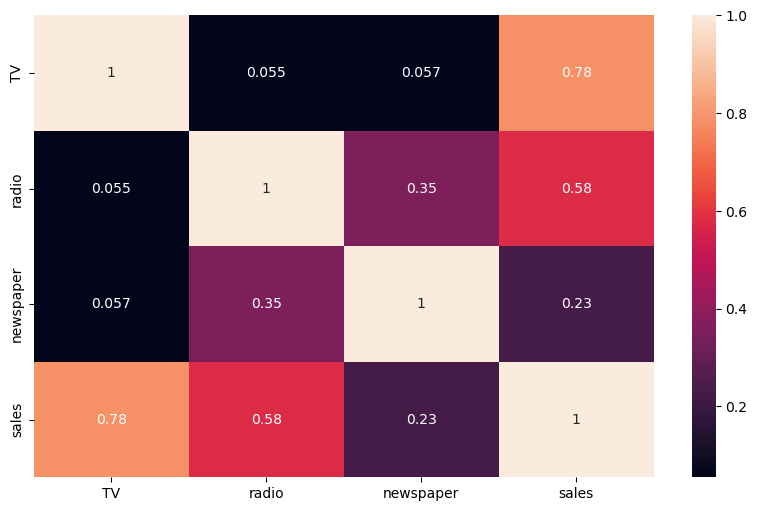

In [21]:
sns.heatmap(df.corr(), annot=True);

In [22]:
from scipy.stats import skew

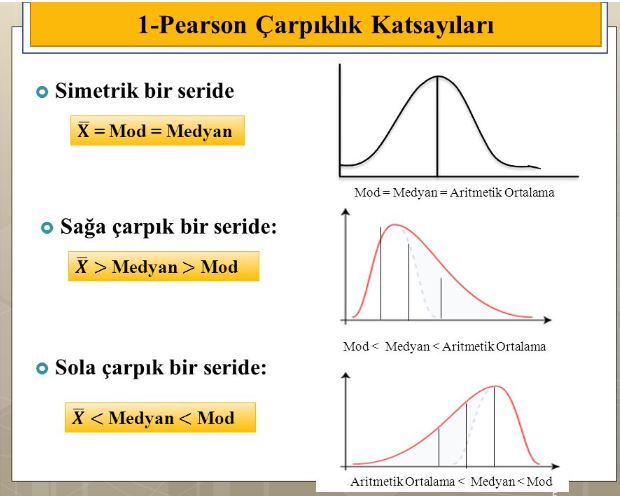

In [24]:
# skewness tespiti için bir döngü
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

# sales sütunu haricindeki tüm feature ların skewness degerini hesplar

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


 > -0.5 ile + 0.5 arasındaki skewness degerlerinde dagılımın kabaca simetrik oldugu kabul edilebilir

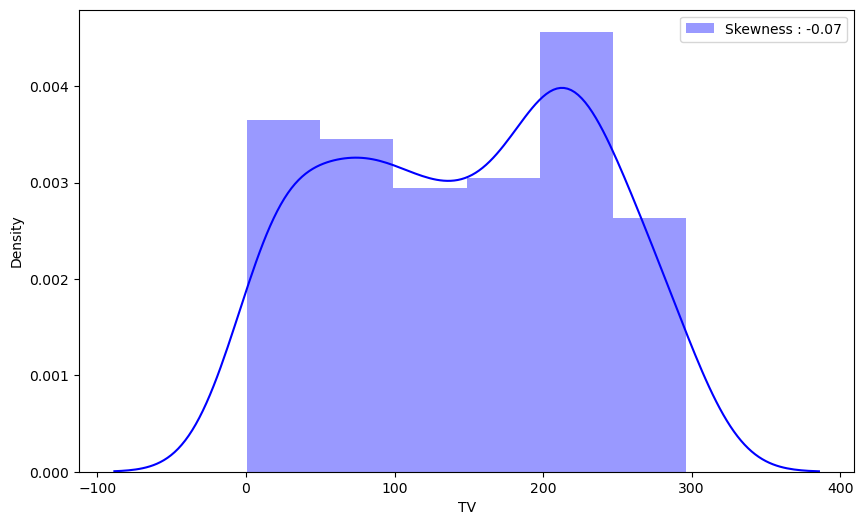

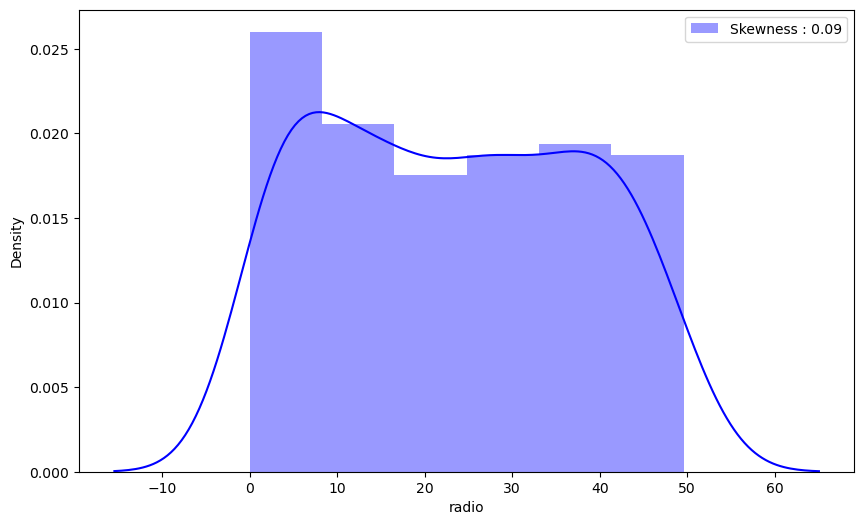

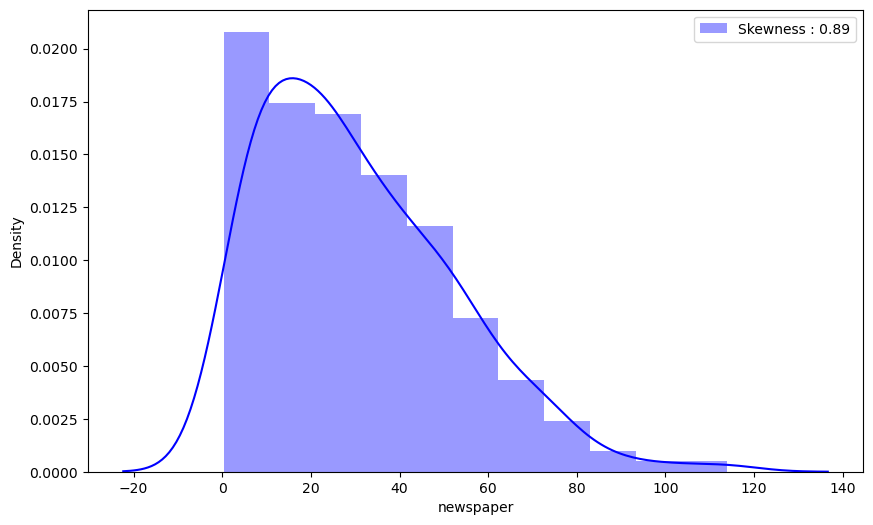

In [25]:
for j in df.drop(columns = "sales").columns:     #"sales" sütunu dataframe'den kaldırılıyor
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))   #  j sütununa ait veri dağılımı grafiği çiziliyor. grafiğin üzerinde gösterilen etiketi oluşturur. Etiket, o sütunun çarpıklık değerini (skewness) içerir
    g = g.legend(loc= "best")   #  grafiğin üzerine eklenen etiketin konumunu en iyi yere yerleştirmes
    plt.show()

In [3]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


  # 2 Train-Test Split

In [ ]:
# !pip install scikit-learn
# !pip install sklearn

In [ ]:
# X: feature (tv, radioa, newspaper) y : Target variable (sales)

In [4]:
X = df.drop(columns = "sales")  # ya da df[["TV," "radio"]]
y = df.sales 

In [5]:
print (X, y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [6]:
# test ve train veri setini rastegele ayırır
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state= 42)  # test_size 0.3 %30 test için ayır dedik

In [ ]:
# %30 test datası %70 train datası

# train_datası modeli eğitmek için kullanılır
# test_datası ise train datasından gelen modeli denemek için kullanılır

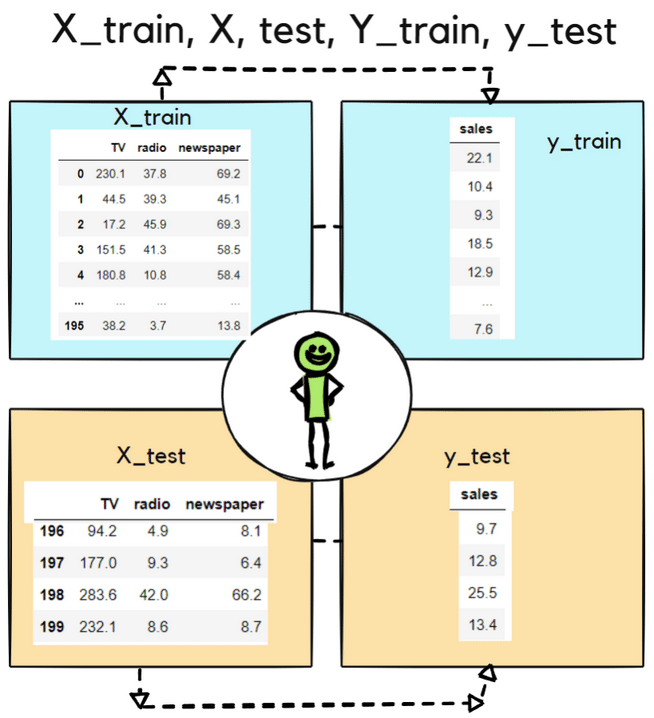

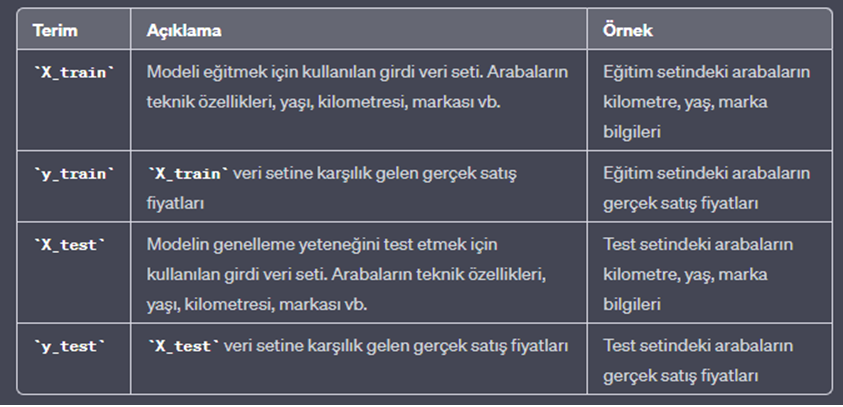

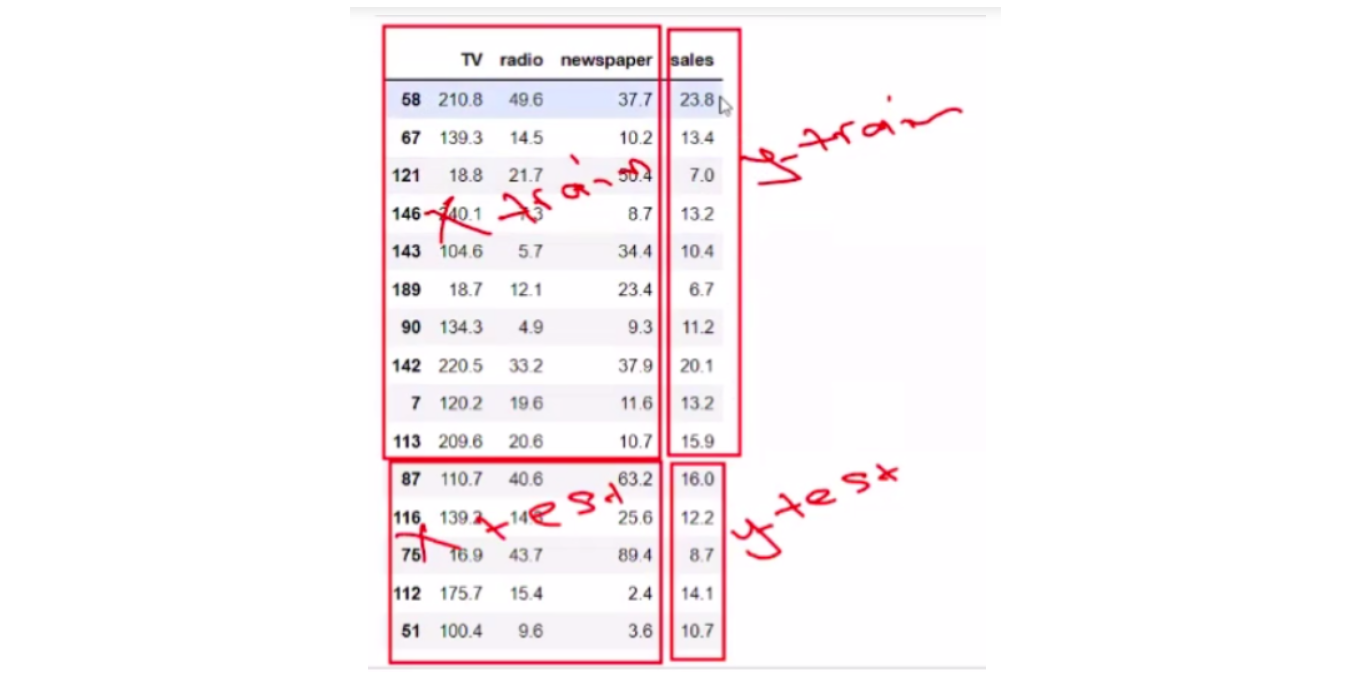

In [8]:
df.sample(15)

,TV,radio,newspaper,sales
65,69.0,9.3,0.9,9.3
136,25.6,39.0,9.3,9.5
110,225.8,8.2,56.5,13.4
113,209.6,20.6,10.7,15.9
116,139.2,14.3,25.6,12.2
165,234.5,3.4,84.8,11.9
89,109.8,47.8,51.4,16.7
80,76.4,26.7,22.3,11.8
107,90.4,0.3,23.2,8.7
57,136.2,19.2,16.6,13.2


In [9]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


In [10]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [11]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

 # 3 Model Fitting and Compare Actual and Predicted Labels

In [ ]:
from sklearn.linear_model import LinearRegression 

In [16]:
# hyperparameter tuning : en uygun değeri bulana kadar tarama yapar 
model = LinearRegression ()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict (X_test)
y_pred


array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [19]:
model.coef_  # X'in katsayıları 

array([0.04405928, 0.1992875 , 0.00688245])

In [ ]:
model.feature_names_in_  # bu değerlerin neye (feature) ait olduğunu söyledi

In [21]:
model.intercept_   # sabit değeri verir 

2.70894909251591

In [22]:
# herhangi 1 satırdaki değerler için tahmin yapalım. manuel y_pred hesapladık
sum(X_test.loc[95]*model.coef_) + model.intercept_

16.565396297434837

In [23]:
df.iloc[95]

TV           163.3
radio         31.6
newspaper     52.9
sales         16.9
Name: 95, dtype: float64


y = b0 + b1x1 + b2x2 + ... + bn*xn
Burada y hedef değişkeni, x'ler bağımsız değişkeni, b1,2,3.... ise modelin eğimini (yani model.coef_ değerini) ve b0  ise y eksenini kesen noktayı (yani model.intercept_ değerini) ifade eder.  Her katsayı, ilgili bağımsız değişkenin hedef değişken üzerindeki etkisini gösterir.
Özetle, model.coef_ çıktısı, lineer model tarafından öğrenilen bağımsız değişkenlerin katsayılarının bir listesidir. kısaca bu katsayılar için şunu diyebiliriz burada büyük olan diğerlerine nazaran daha etkilidir. burada da önemli olan bir husus var datanın scale edilmesi.
 bu değerleri tek bir kodla görmek mantıklı olmaz. ikisi aynı anlamda yorumlanmıyor çünkü. Her biri farklı bir amaca hizmet ediyor.
Belirtmek isterim ki bazı modellerde intercept olmayabilir. Bu durumda model.coef_ yazınca sadece katsayılar (slope) gelmelidir değil mi arkadaşlar?

In [25]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [26]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [27]:
result_sample = comparing.sample (25)

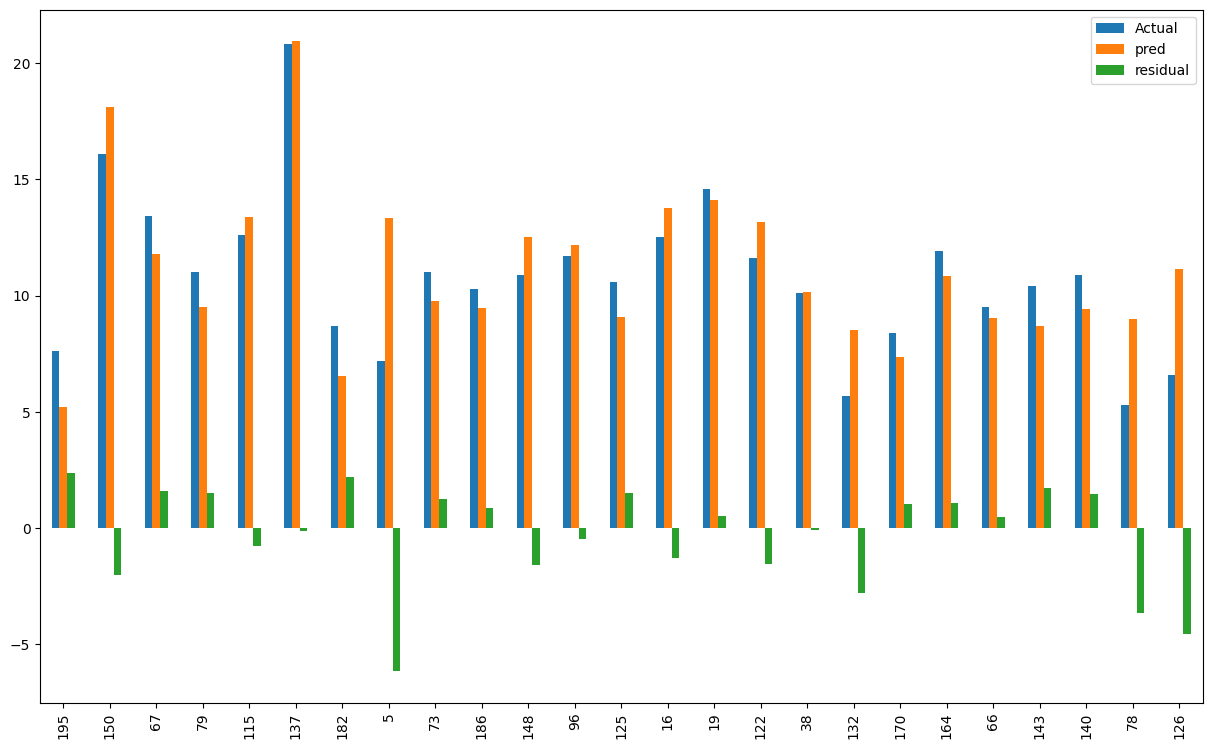

In [28]:
result_sample.plot (kind = "bar", figsize = (15,9))
plt.show()

# Error Metrics 

In [ ]:
# modelin başarısını ölçelim


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# performance değerlendirme için error metrikleri
# RMSE (rooot mean square errr) metriğini manuel hesaplıycaz

In [31]:
R2_score = r2_score(y_test, y_pred)  # R2 için yüksek diğer metrikler düşük olmalı
R2_score

0.8609466508230368

In [32]:
# mean absolute error MAE : düşük olmalı 
mae = mean_absolute_error (y_test, y_pred)
mae 
# mae 0a yakın olmalı

1.5116692224549084

In [33]:
# mean saquare  error MSE : düşük olmalı , kare alındığı için hataları ağır cezalandırır
mse = mean_squared_error (y_test, y_pred)
mse

3.79679723671522

In [34]:
rmse = np.sqrt(mse)  # mean_squared_error (y_test, y_pred)
rmse

1.9485372043446387

In [ ]:
# ortalama Hata Oranı

In [35]:
sales_mean = df.sales.mean()
sales_mean 

14.0225

In [36]:
# mean abosolute error
mae / sales_mean  # bu değer "0"a yakın olmalı. hataların oranı veri seti büyüklüğüne göre küçük denebilir

0.10780311802138764

In [ ]:
# MAE için = Ortalama mutlak hata, satışların ortalama değerinin yaklaşık %10.78'i kadardır.

In [37]:
# RMSE Hata Oranı
# rootmean square büyük hatalaır daha fazla cezalandırır hassas
# rakam yüksekse olutlier var bunun bilgisini sunar

rmse / sales_mean

0.138957903679418